# Consider only the below columns and prepare a prediction model for predicting Price.

- **Price  -- Offer Price in EUROs**
- **Age_08_04 -- Age in months as in August 2004**
- **KM -- Accumulated Kilometers on odometer**
- **HP -- Horse Power**
- **cc -- Cylinder Volume in cubic centimeters**
- **Doors -- Number of doors**
- **Gears -- Number of gear positions**
- **Quarterly_Tax -- Quarterly road tax in EUROs**
- **Weight -- Weight in Kilograms**

## Attaching Resources

### Importing Necessary Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_style(style='darkgrid')
plt.tight_layout()

<Figure size 3000x1500 with 0 Axes>

### Adding Dataset

In [2]:
tc = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_05_Multi%20Linear%20Regression/Dataset/ToyotaCorolla.csv', encoding='latin1')

In [43]:
tc = tc[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

tc

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [4]:
tc.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [5]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
tc.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
def uni(df):
    
    for i in range(len(df.columns)):
        print('\n All Unique Value in '+ str(df.columns[i]) )
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' + str(len(df[df.columns[i]].unique())))
        

In [8]:
uni(tc)


 All Unique Value in Price
[ 4350  4400  4450  4750  5150  5250  5600  5740  5750  5751  5800  5845
  5900  5950  6000  6150  6250  6400  6425  6450  6490  6495  6500  6550
  6640  6650  6750  6800  6900  6950  6990  6999  7000  7145  7150  7200
  7250  7300  7350  7400  7450  7460  7490  7495  7499  7500  7600  7750
  7795  7800  7850  7900  7950  7990  7995  7999  8000  8050  8100  8150
  8200  8250  8400  8450  8490  8495  8500  8600  8695  8700  8745  8750
  8800  8850  8895  8900  8950  8990  8995  9000  9130  9200  9245  9250
  9390  9400  9450  9475  9500  9550  9650  9695  9700  9750  9795  9799
  9800  9850  9895  9900  9930  9940  9950  9980  9990  9995 10000 10250
 10295 10350 10400 10450 10495 10500 10600 10750 10800 10845 10850 10895
 10900 10950 10990 10995 11000 11250 11290 11450 11480 11495 11500 11650
 11690 11695 11700 11710 11750 11790 11895 11900 11925 11930 11950 11990
 12000 12200 12250 12295 12400 12450 12495 12500 12695 12750 12850 12900
 12950 12995 13000 1325

In [9]:
np.sort(tc['KM'].unique())

array([     1,     15,    225, ..., 218118, 232940, 243000], dtype=int64)

In [10]:
np.sort(tc['KM'].unique())[0]

1

- Just confirming Kilometers lowest value.

### Visualizing The Data

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

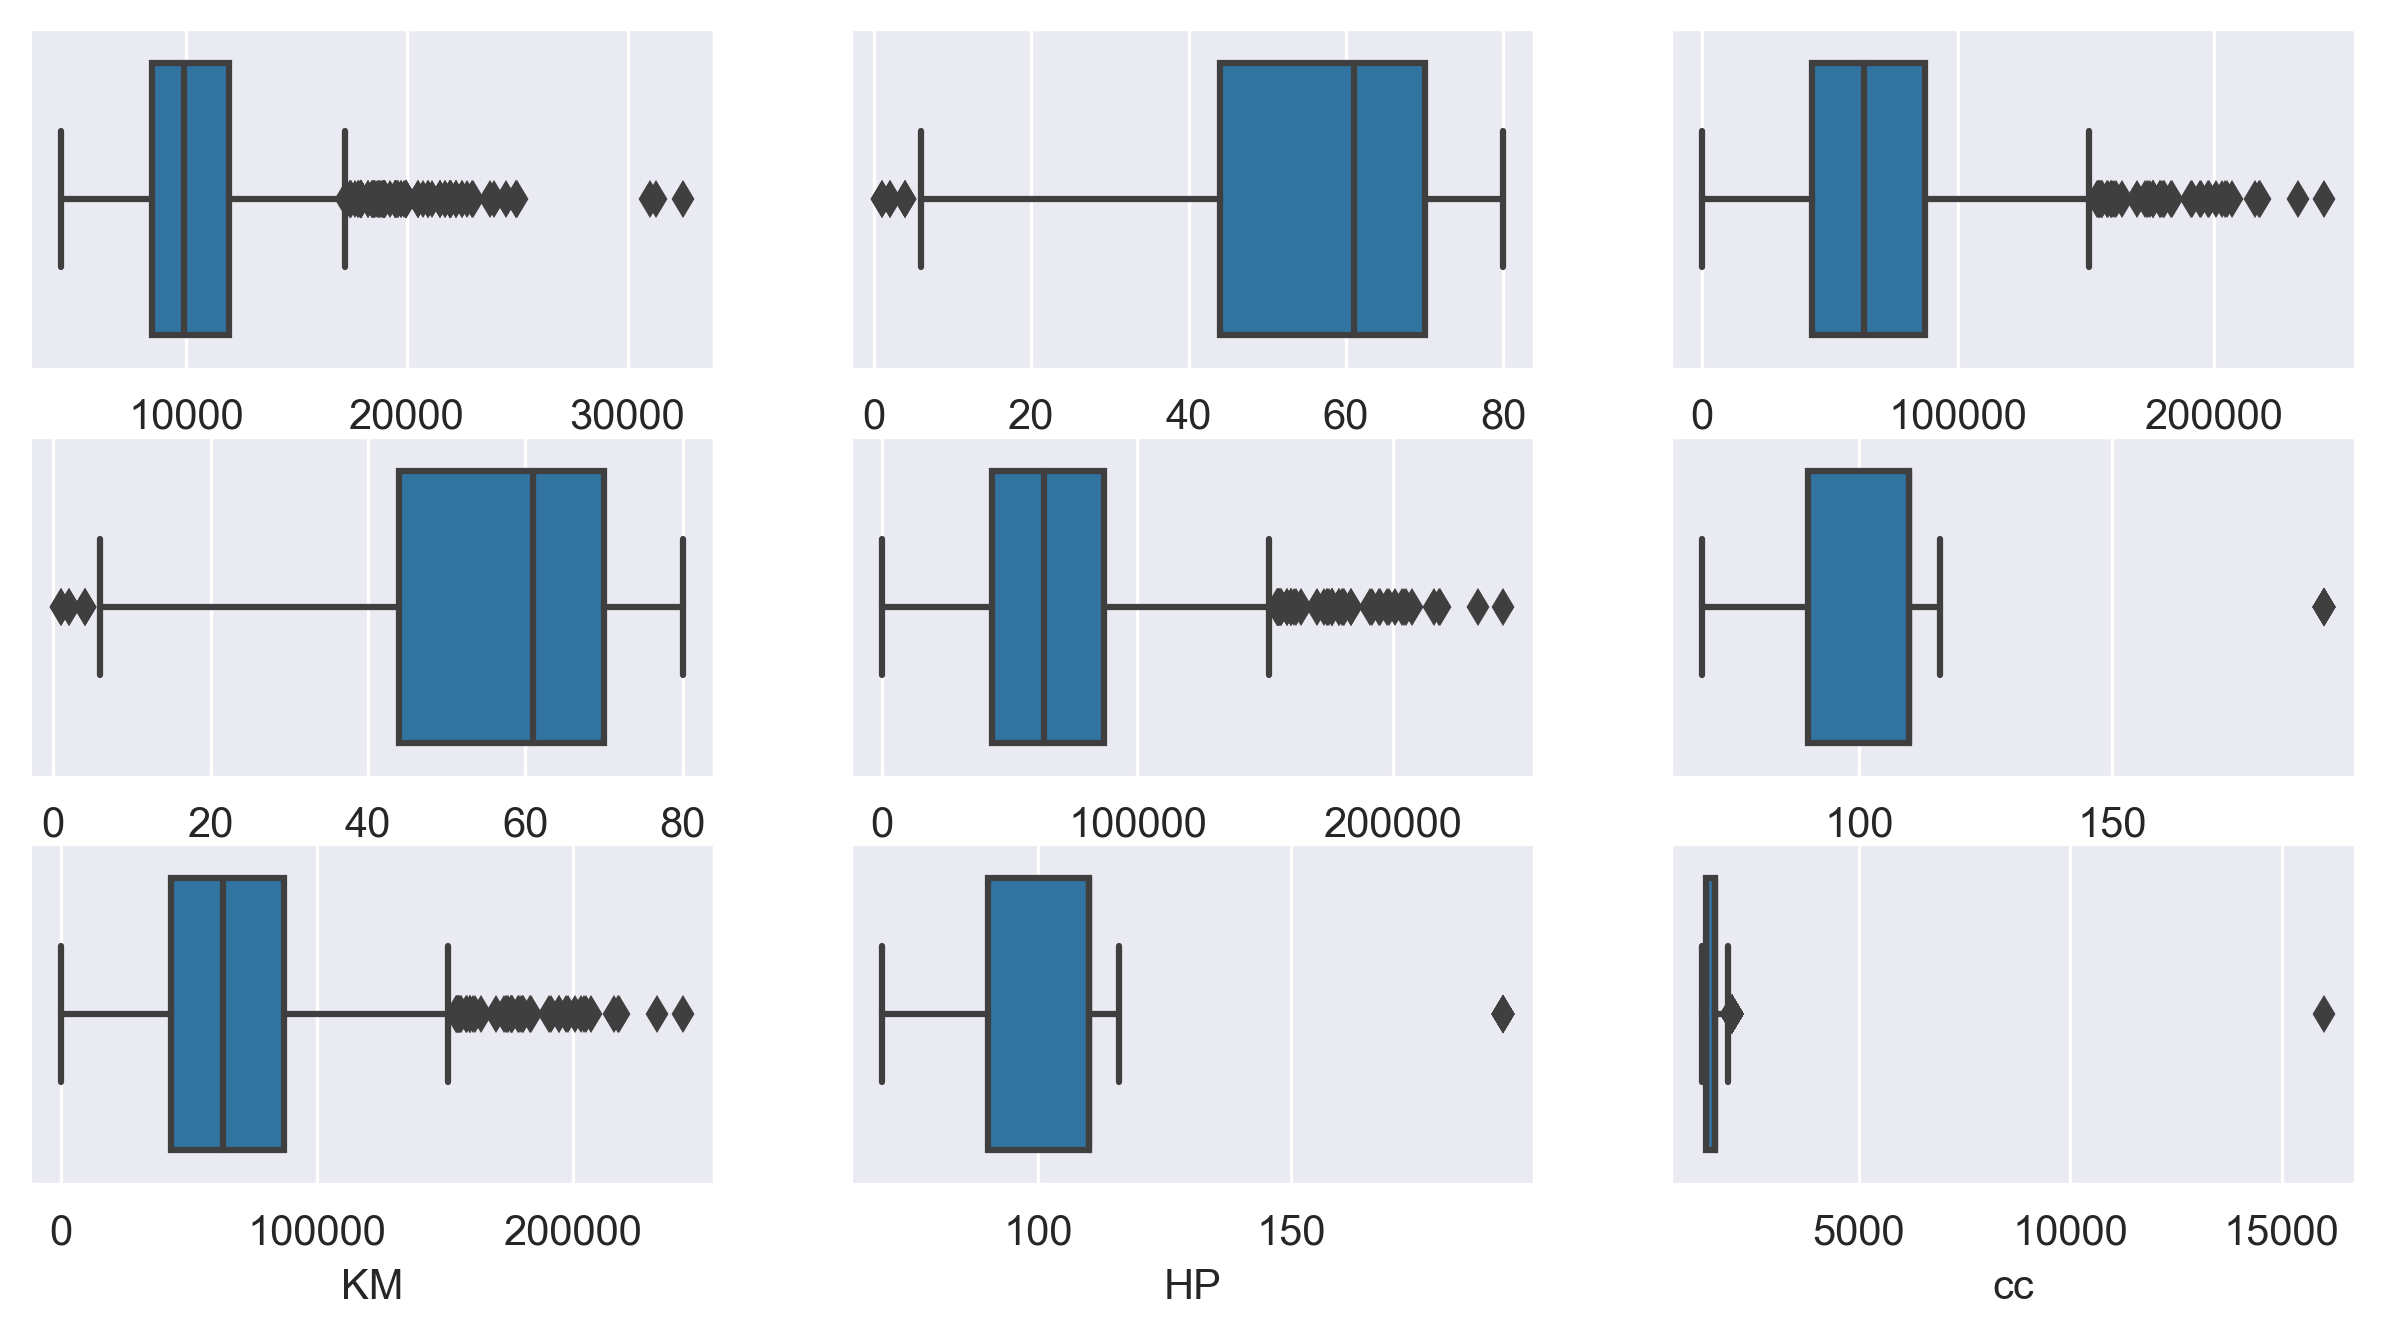

In [77]:
fig, ax = plt.subplots(3,3)

for i in range(3):
    for j in range(3):
        sns.boxplot(tc[tc.columns[i+j]], ax = ax[i,j])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

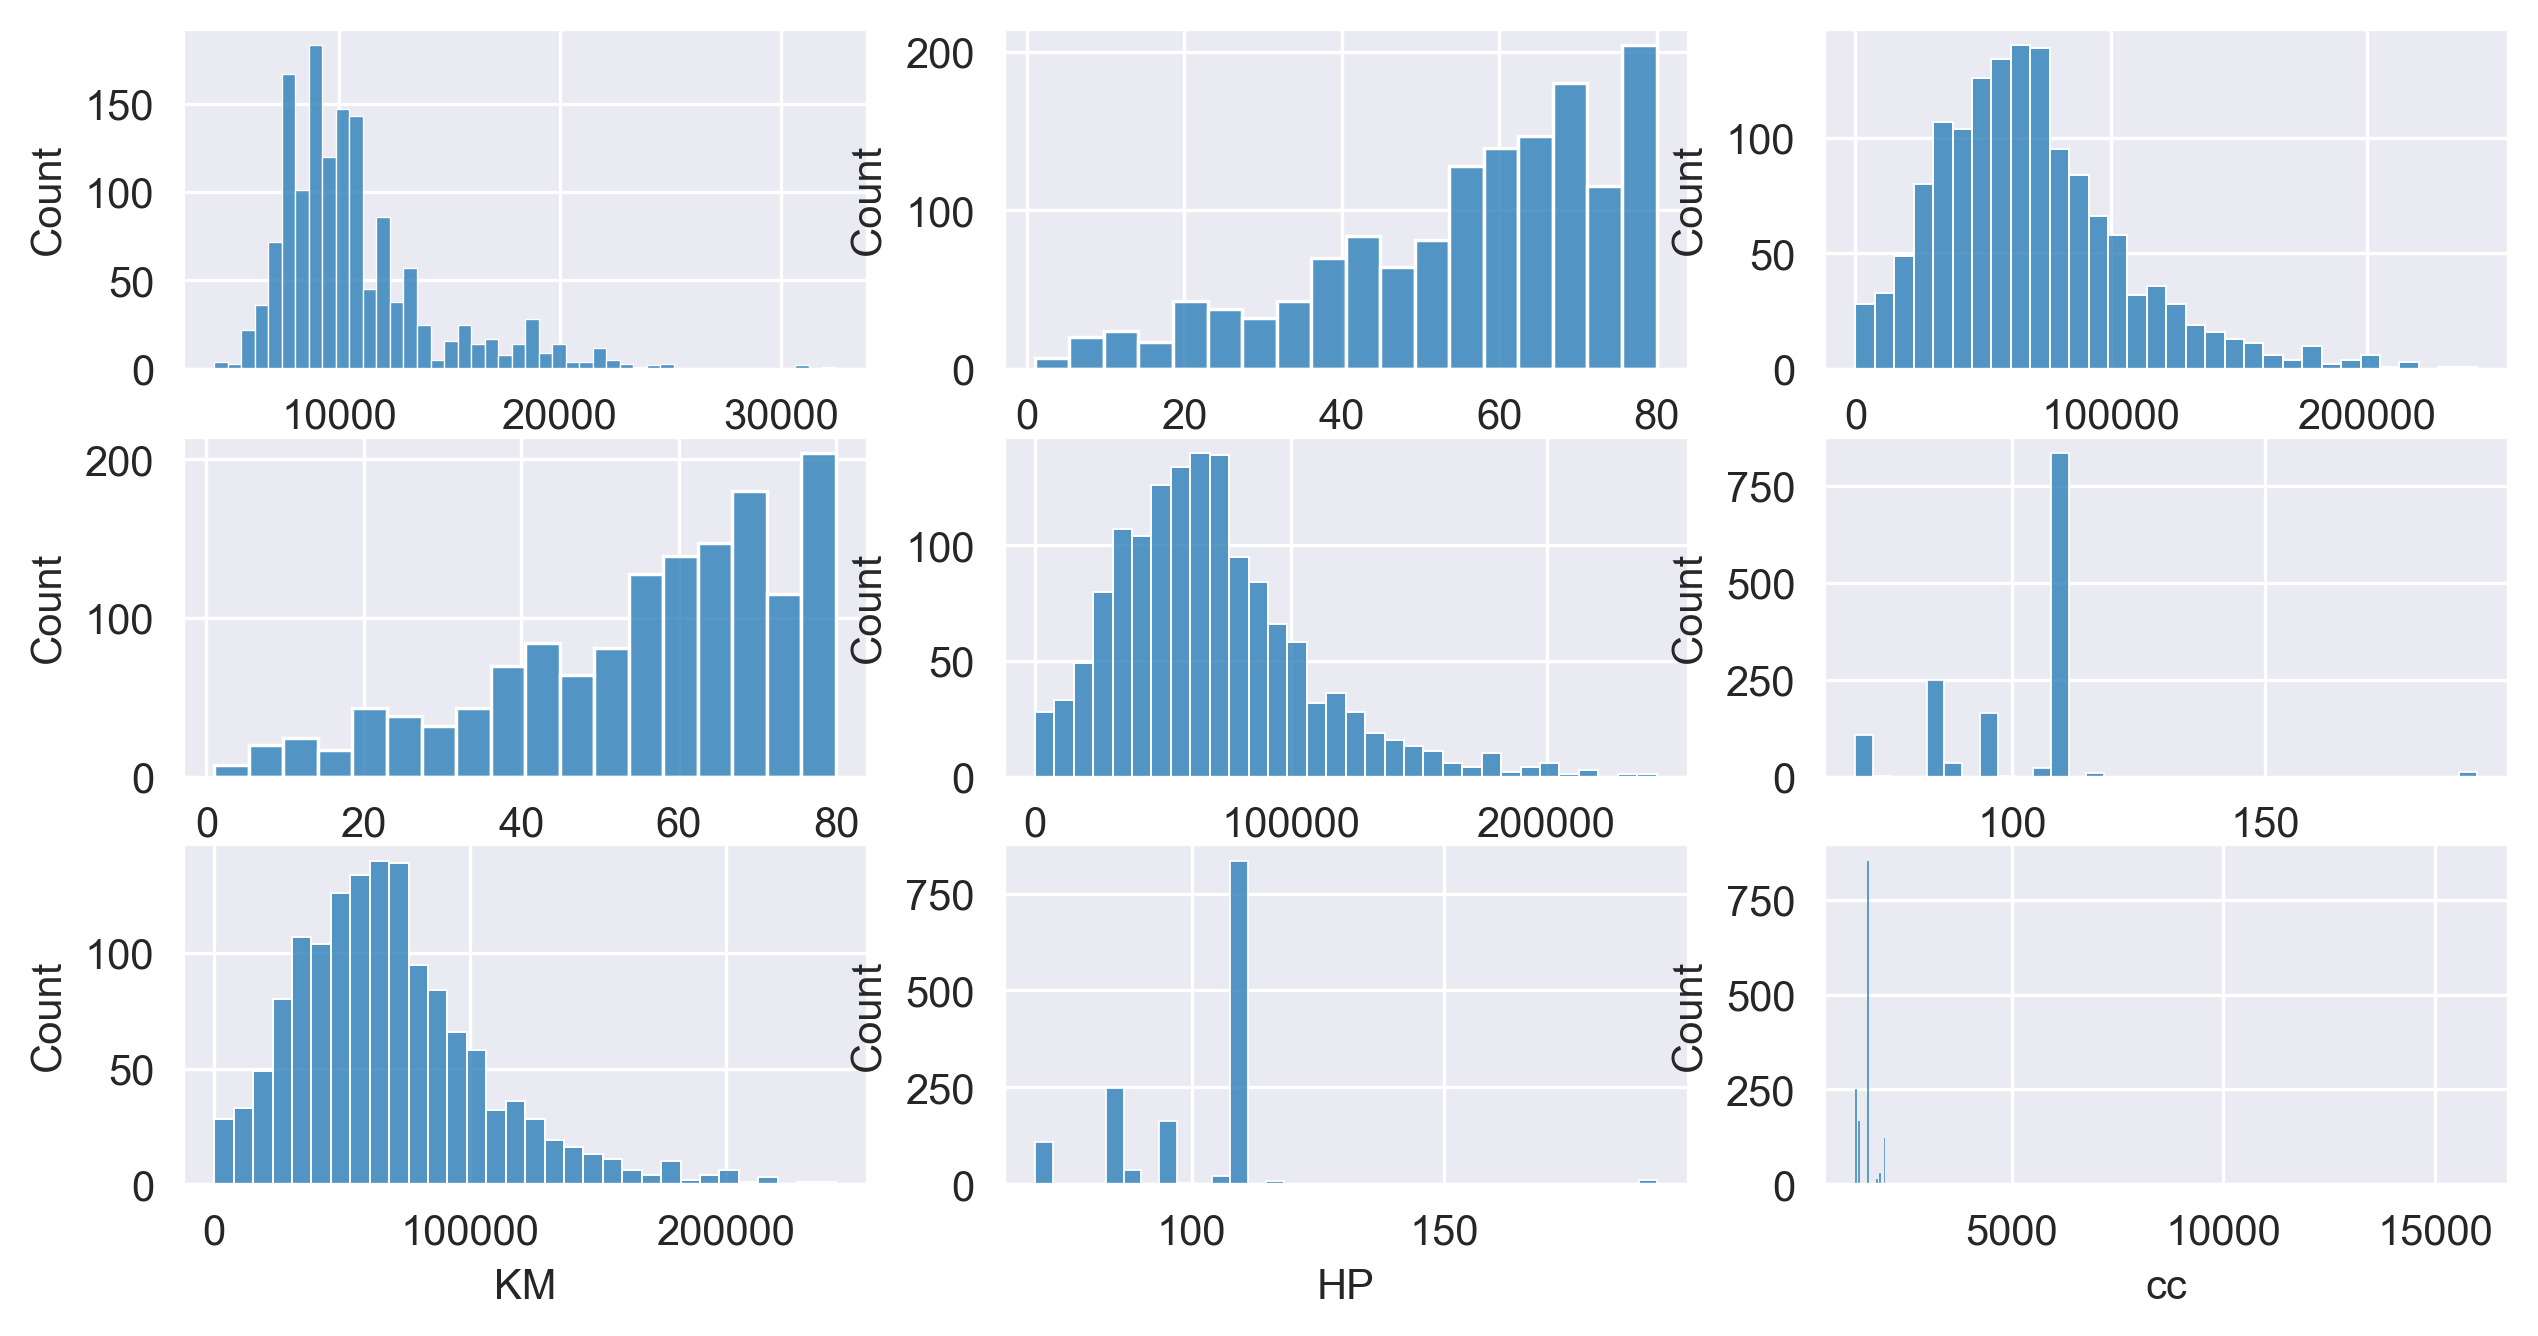

In [84]:
fig, ax = plt.subplots(3,3)

for i in range(3):
    for j in range(3):
        sns.histplot(tc[tc.columns[i+j]], ax = ax[i,j])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

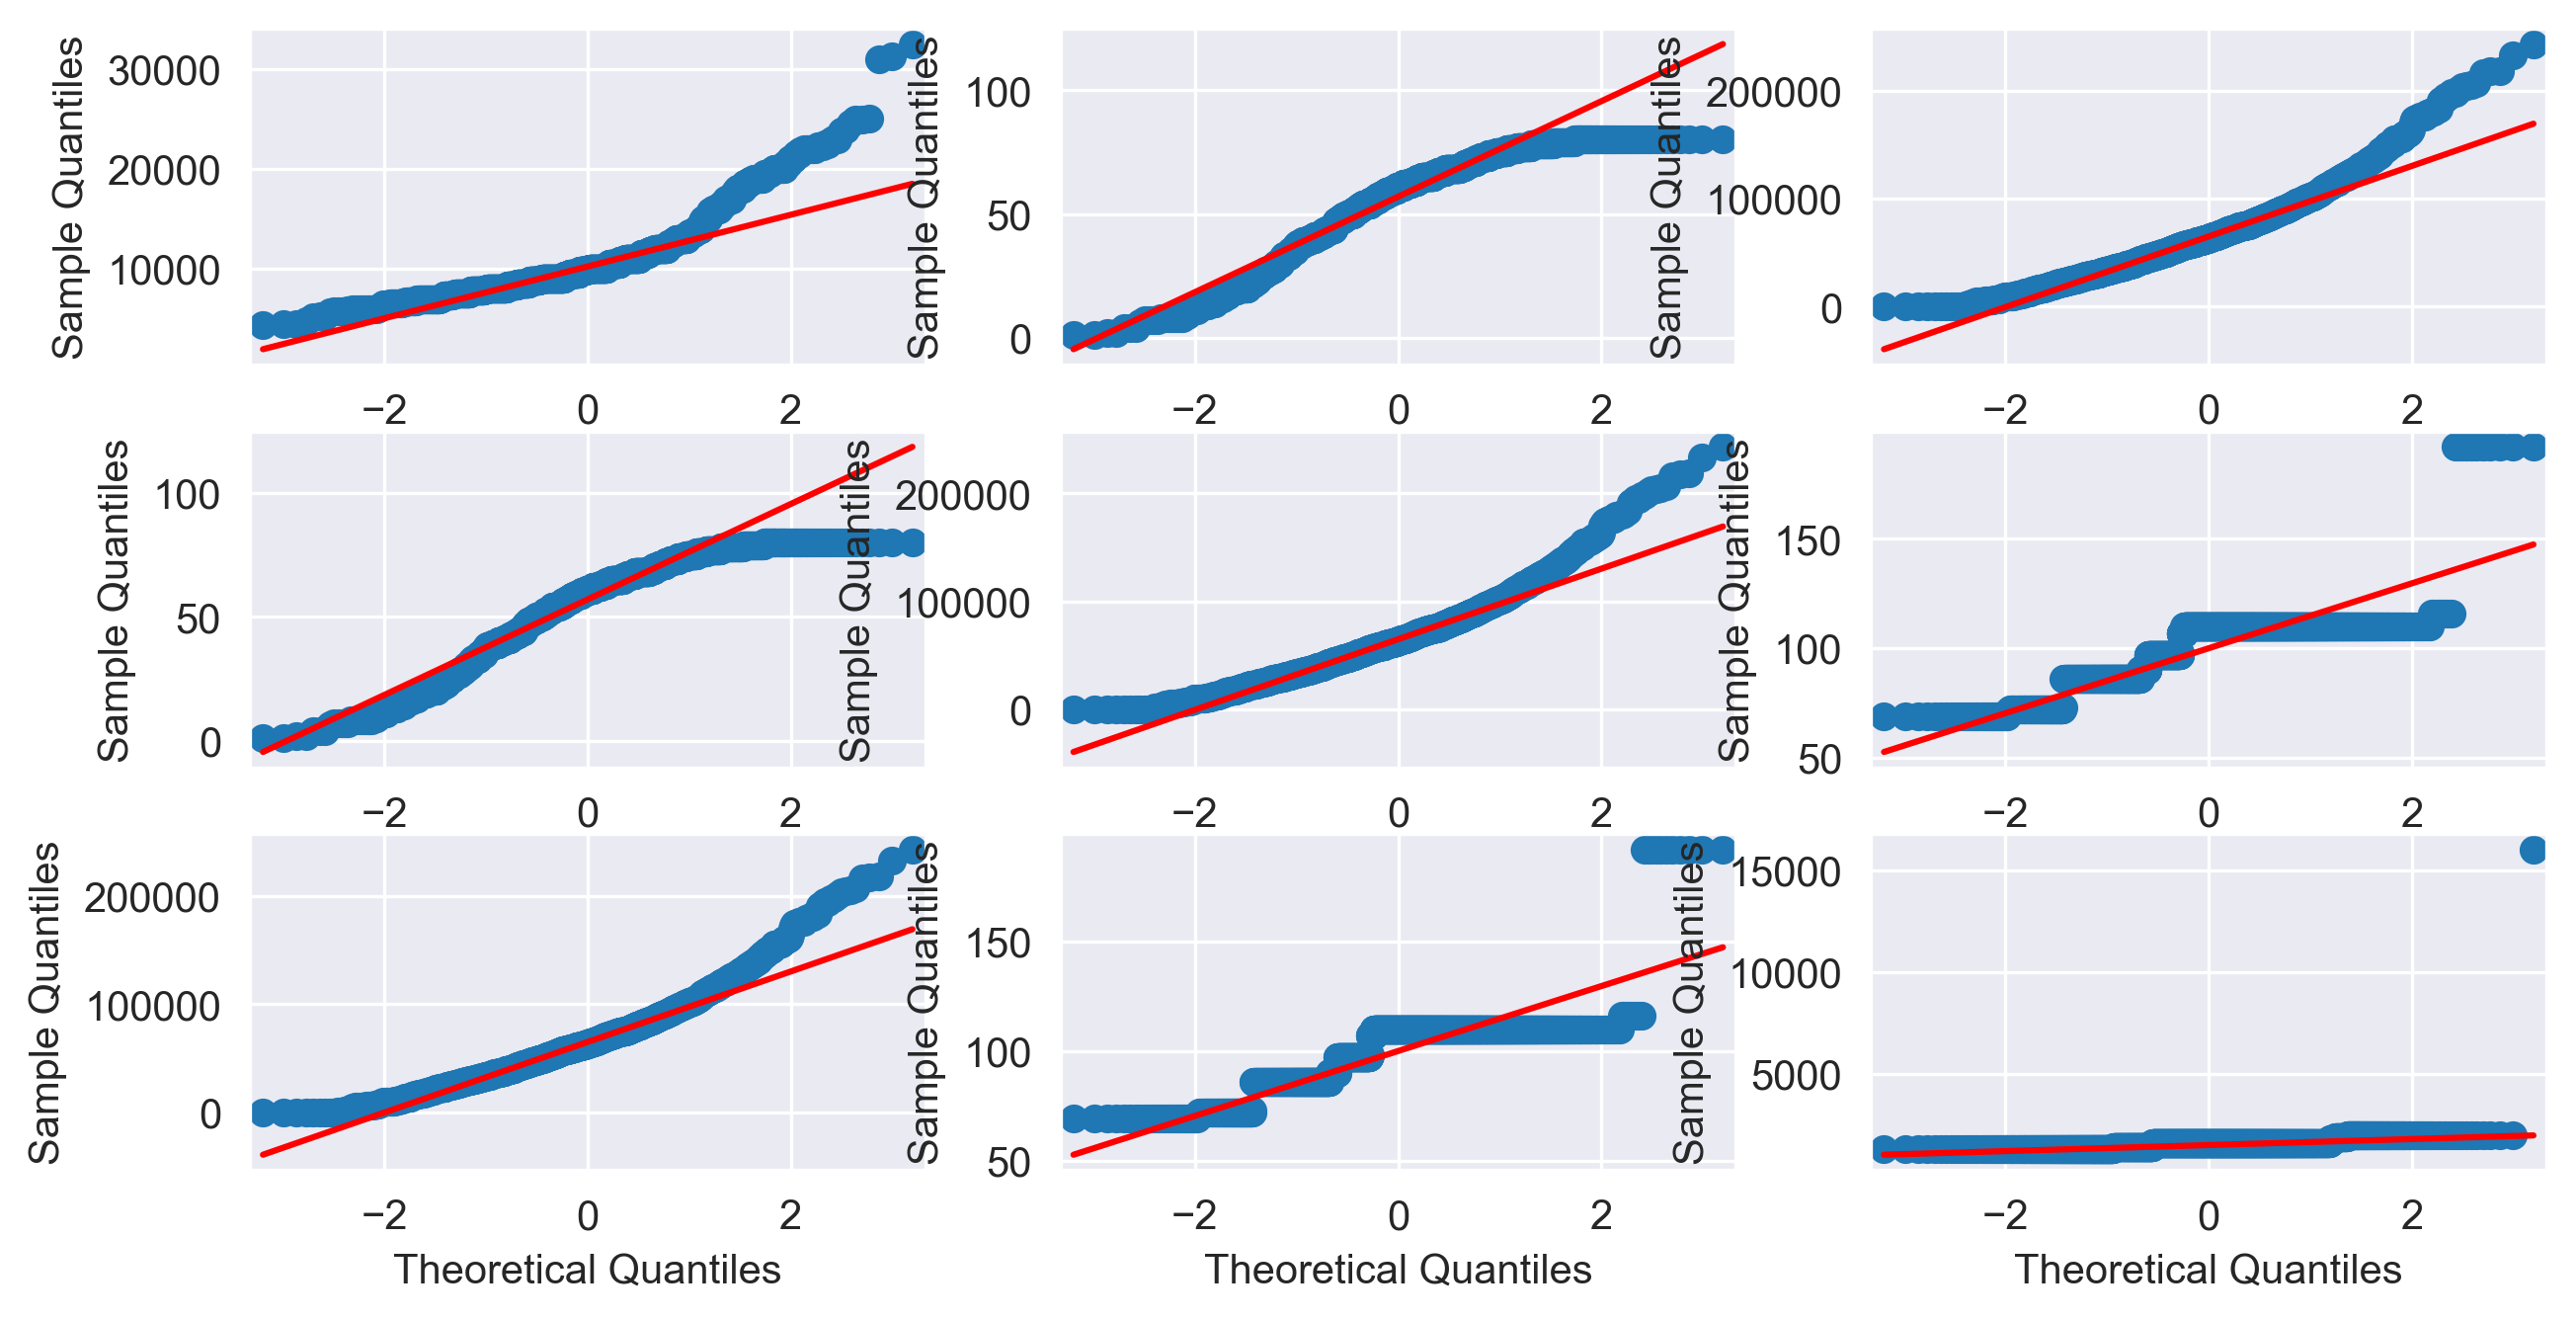

In [85]:
fig, ax = plt.subplots(3,3)

for i in range(3):
    for j in range(3):
        sm.qqplot(tc[tc.columns[i+j]], ax = ax[i,j], line ='q')

plt.tight_layout